### 가지고 있는 이미지로 딥러닝 모델 만들기
1. 이미지 불러오기 <br><br>
2. 이미지 크기 맞춰주기 <br><br>
3. 

### pil로 이미지 불러오기

In [848]:
from PIL import Image
import numpy as np

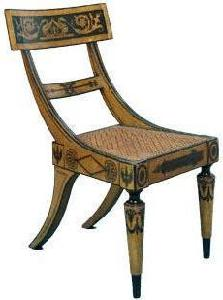

In [849]:
img = Image.open('./Data/chair/image_0001.jpg')
img

In [850]:
# img 배열 확인
np.array(img).shape

(300, 223, 3)

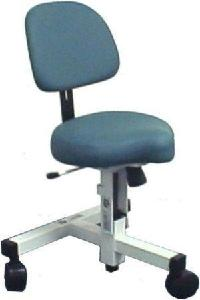

In [851]:
img = Image.open('./Data/chair/image_0002.jpg')
img

In [852]:
np.array(img).shape

(300, 200, 3)

> #### 이미지의 해상도가 일정하지 않다.
> #### 전체 이미지의 해상도의 평균을 가지고 적용해보자.

### 전체 이미지 가져와서 해상도 평균 보기

In [853]:
import glob # 여러 파일 가져오는 방법

In [854]:
widthRatio = []
heightRatio = []

for file in sorted(glob.glob('./Data/chair/*.jpg')):
    img = Image.open(file)    
    widthRatio.append(np.array(img , dtype=np.int32).shape[1])
    heightRatio.append(np.array(img , dtype=np.int32).shape[0])

In [855]:
# 가로 너비 평균
np.mean(widthRatio)

230.69354838709677

In [856]:
# 세로 너비 평균
np.mean(heightRatio)

296.98387096774195

In [857]:
# 전체 개수
len(widthRatio)

62

> #### max , min , mean 중에 무엇이 좋을지는 직접 해봐야 한다.
> #### 지금은 모든 사진을  해상도 너비를 231 , 높이를 297로 맞추자. 
> #### 근데 픽셀은 홀수가 없다. 짝수로 해야 된다는 것만 명심해 두고 일단은 이렇게 하자.

--- 
### 

### Chair의 이미지 해상도 변경 및 Gray Scale로 적용하기

In [858]:
# chair의 파일 갯수 : 62
i = 0
for file in sorted(glob.glob('./Data/chair/*.jpg')):
    img = Image.open(file)
    imgResize = img.resize(
        (231,297), # 이미지 크기 조절
        Image.Resampling.LANCZOS # 비어 있는 이미지를 메꿔서 처리하는 방식
    )
    imgResize = imgResize.convert(
        'L' # Gray Scale로 바꾸기 , 투명도가 있을 경우 LA
        )  
    imgResize.save('./Data/chairNew/image_%04d.jpg'%i,'JPEG')
    i+=1
    if i >= 60:
        break

### Chair image를 numpy로 변경하기

- numpy array는 고정 값이다. python list는 유동적인 것에 반해 <br><br>

In [859]:
number_of_data = 60 # 데이터 수
img_width_size = 231
img_height_size = 297

In [860]:
# img 들어갈 numpy array 만들기 
chairData = np.zeros(number_of_data * img_width_size * img_height_size , dtype= np.int32).reshape(60,297,231)

In [861]:
chairData[50]

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [862]:
i = 0
for file in sorted(glob.glob('./Data/chairNew/*.jpg')):
    img = Image.open(file)
    chairData[i,:,:] = np.array(img, dtype=np.int32)
    i += 1

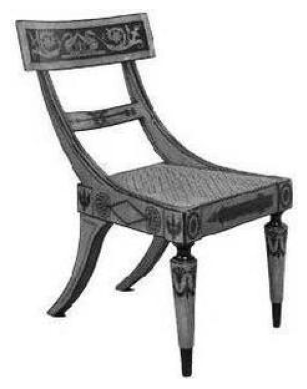

In [863]:
# 이미지 확인하기
import matplotlib.pyplot as plt

plt.imshow(
    chairData[0].reshape(297,231),
    cmap='gray'
)

plt.axis('off')

plt.show()

### 딥러닝 돌릴 다른 이미지도 똑같이 하기 - 노트북

In [864]:
i = 0
for file in sorted(glob.glob('./Data/laptop/*.jpg')):
    img = Image.open(file)
    imgResize = img.resize((img_width_size,img_height_size),Image.Resampling.LANCZOS)
    imgResize = imgResize.convert(
        'L' # Gray Scale로 바꾸기 , 투명도가 있을 경우 LA
        )  
    imgResize.save('./Data/laptopNew/image_%04d.jpg'%i,'JPEG')
    i+=1
    if i>= 60:
        break

In [865]:
# img 들어갈 numpy array 만들기 
laptopData = np.zeros(number_of_data * img_width_size * img_height_size , dtype= np.int32).reshape(60,297,231)

In [866]:
i = 0
for file in sorted(glob.glob('./Data/laptopNew/*.jpg')):
    img = Image.open(file)
    laptopData[i,:,:] = np.array(img, dtype=np.int32)
    i += 1

---
### train , target data 만들기

In [867]:
laptopData.shape

(60, 297, 231)

In [868]:
chairData.shape

(60, 297, 231)

In [869]:
train = np.concatenate((chairData,laptopData))
target = np.concatenate((np.zeros(60),np.ones(60)))

In [870]:
train.shape

(120, 297, 231)

In [897]:
train

array([[[  3,   3,   3, ...,   0,   0,   0],
        [  3,   3,   3, ...,   0,   0,   0],
        [  2,   2,   2, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0]],

       [[  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        [  0,   0,   0, ...,   0,   0,   0],
        ...,
        [  0,   0,   0, ...,   3,   8,   4],
        [  1,   2,   0, ...,   0,   0,   5],
        [  0,   0,   0, ...,   0,   0,   1]],

       [[ 75,  75,  75, ...,  81,  82,  82],
        [ 75,  75,  75, ...,  81,  81,  81],
        [ 75,  75,  75, ...,  80,  81,  81],
        ...,
        [  9,   9,   9, ...,   9,   9,   9],
        [  9,   9,   9, ...,   9,   9,   9],
        [  9,   9,   9, ...,   9,   9,   9]],

       ...,

       [[  6,   6,   6, ...,   6,   6,   6],
        [  6,   6,   6, ...,   6,   6,   6],
        [  6,   6,   6, ...,   6,   6,   6

In [871]:
target

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1.])

### CNN을 위한 train 과 valid 분류하기

In [872]:
train = 255 - train

In [873]:
# train = np.abs(train)

In [874]:
train_scaled = train.reshape(-1,297,231,1) / 255.0

In [875]:
from sklearn.model_selection import train_test_split

In [876]:
train_scaled , val_scaled , train_target , val_target = \
    train_test_split(train_scaled,target,test_size=0.2,random_state=42)

In [896]:
train[0]

array([[3, 3, 3, ..., 0, 0, 0],
       [3, 3, 3, ..., 0, 0, 0],
       [2, 2, 2, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int32)

In [877]:
from tensorflow import keras

In [878]:
# 딥러닝 모델 만들기
model = keras.Sequential()

# 합성곱 층 (CNN)
model.add(keras.layers.Conv2D(
    32,
    kernel_size = 3,
    activation = 'relu',
    padding = 'same',
    input_shape = (297,231,1)
))

# pooling
model.add(keras.layers.MaxPooling2D(
    2
))


model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100,activation='relu'))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(2,activation='sigmoid'))

model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics='accuracy')

checkpoint_cb = keras.callbacks.ModelCheckpoint('./Data/best-cnn-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3,restore_best_weights=True)

hist = model.fit(train_scaled,
                 train_target,
                 epochs=20,
                 validation_data = (val_scaled,val_target),
                 callbacks=[checkpoint_cb,early_stopping_cb]
                 )

Epoch 1/20
3/3 [==============================] - 3s 958ms/step - loss: 12.9595 - accuracy: 0.5312 - val_loss: 10.9375 - val_accuracy: 0.5417
Epoch 2/20
3/3 [==============================] - 3s 889ms/step - loss: 8.3733 - accuracy: 0.5938 - val_loss: 7.4611 - val_accuracy: 0.4583
Epoch 3/20
3/3 [==============================] - 2s 703ms/step - loss: 3.8635 - accuracy: 0.5833 - val_loss: 1.8820 - val_accuracy: 0.7917
Epoch 4/20
3/3 [==============================] - 2s 754ms/step - loss: 1.1042 - accuracy: 0.8229 - val_loss: 0.4861 - val_accuracy: 0.7917
Epoch 5/20
3/3 [==============================] - 2s 706ms/step - loss: 0.6258 - accuracy: 0.8021 - val_loss: 0.3642 - val_accuracy: 0.7500
Epoch 6/20
3/3 [==============================] - 2s 747ms/step - loss: 0.2927 - accuracy: 0.8646 - val_loss: 0.6185 - val_accuracy: 0.8333
Epoch 7/20
3/3 [==============================] - 2s 658ms/step - loss: 0.3238 - accuracy: 0.8958 - val_loss: 0.3669 - val_accuracy: 0.8333
Epoch 8/20
3/3 [==

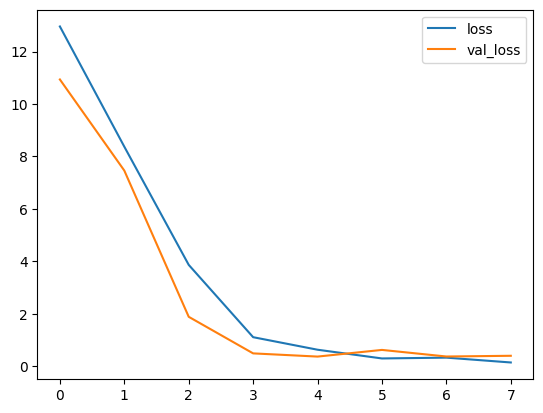

In [879]:
plt.plot(
    hist.history['loss'],
    label = 'loss'
)

plt.plot(
    hist.history['val_loss'],
    label = 'val_loss'
)

plt.legend()

plt.show()

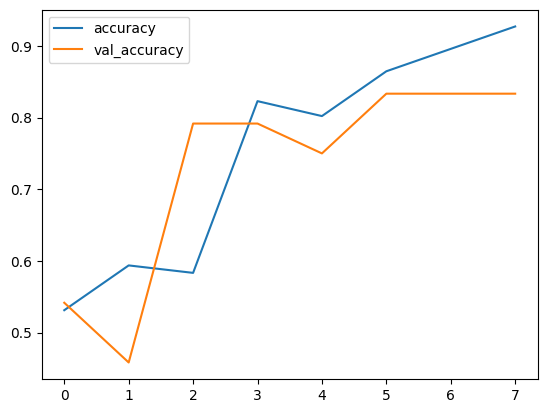

In [880]:
plt.plot(
    hist.history['accuracy'],
    label = 'accuracy'
)

plt.plot(
    hist.history['val_accuracy'],
    label = 'val_accuracy'
)

plt.legend()

plt.show()

In [881]:
model.evaluate(val_scaled,val_target)

1/1 [==============================] - 0s 87ms/step - loss: 0.3642 - accuracy: 0.7500


[0.3642060458660126, 0.75]

### 테스트 해보기

In [882]:
test = Image.open('./Data/test.jpeg')

In [883]:
imgResize = test.convert('L')  

In [884]:
test = np.array(imgResize)

In [885]:
test.shape

(297, 231)

In [886]:
test = 255 - test

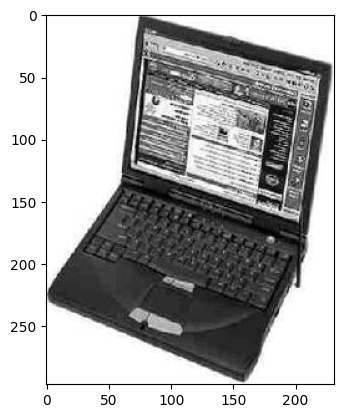

In [887]:
plt.imshow(test,cmap='gray_r')

In [888]:
test_scaled = test.reshape(-1,297,231,1) / 255.0

In [889]:
classes = ['chair','laptop']

In [890]:
classes[np.argmax(model.predict(test_scaled))]

1/1 [==============================] - 0s 34ms/step


'laptop'

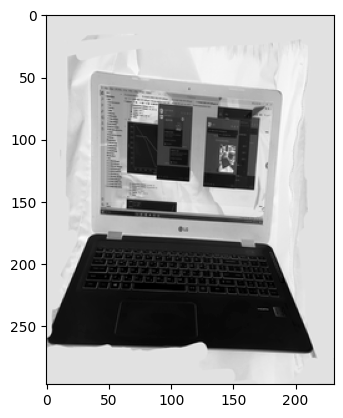

In [891]:
img = Image.open('./Data/test2.jpeg')
imgResize = img.resize((img_width_size,img_height_size),Image.Resampling.LANCZOS)
imgResize = imgResize.convert('L')  
plt.imshow(imgResize,cmap='gray_r')

plt.show()

In [892]:
test = np.array(imgResize)

In [893]:
test_scaled = test.reshape(-1,297,231,1) / 255.0

In [894]:
classes[np.argmax(model.predict(test_scaled))]

1/1 [==============================] - 0s 18ms/step


'laptop'

### 총정리 
- 합성곱층 <br><br>
    - 합성곱층은 예측력 향샹이 수행 속도 향상에 도움이 되는 것이다. <br><br>
    - 느릴시에 필터 개수를 2배로 올려서 넣는 식으로 진행하면 된다. <br><br>
- dense 층 <br><br>
    - 과소적합될 시에 층을 추가하거나, drop out을 줄이는 식으로 진행하면 된다. <br><br>
    - 반대의 경우에는 반대로 하면 된다. <br><br>